In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns

In [2]:
# the measurement station codes (35 stations)
# more detailed information on the stations can be found in metadata/measurement_sites_info.txt
stations = ['ABZ', 'ALE', 'AMA', 'AMM', 'ASP', 'BEI', 'BOT', 'BSL', 'DEL', 'EGB',
            'FKL', 'HAD', 'HEL', 'HPB', 'HRW', 'HYY', 'KCE', 'KPZ', 'MAR', 'MHD', 
            'MLP', 'MUK', 'NAN', 'NEU', 'POV', 'PRL', 'SAO', 'SCH', 'SGP', 'UAE',
            'VAR', 'VHL', 'VIE', 'WAL', 'ZOT']

# list of all variables
# a full description of all variable names can be found in metadata/variable_names.txt
variables = ['aermr01', 'aermr02', 'aermr03', 'aermr04', 'aermr05', 'aermr06', 
             'aermr07', 'aermr08', 'aermr09', 'aermr10', 'aermr11', 'co', 'c5h8', 'c10h16', 
             'nh3', 'no', 'no2', 'so2', 'd2m', 't2m', 'crwc', 'blh', 'rh', 'wind_speed',
             'doy_sin', 'doy_cos', 'latitude', 'longitude']

# list of variables that should NOT be log-transformed
dont_transform = ['d2m', 't2m', 'blh', 'rh', 'doy_sin', 'doy_cos', 'latitude', 'longitude']

# list of variables with '_log' appended for variables that are log-transformed
transf_vars = []
for v in variables:    
    if v in dont_transform:
        transf_vars.append(v)
    else:
        transf_vars.append(v+'_log')
        
# loading the data
data = pd.read_csv('data/full_data.csv', parse_dates=['date'])

# log-transformed n100 values that are < 1 become negative, so they are set to 1
data.loc[data.n100 < 1, 'n100'] = 1

# log-transforming the selected variables, setting negative values to the minimum observed positive value
for v in ['n100']+variables:
    if v not in dont_transform:
        data[v+'_log'] = np.log(data[v].where(data[v] > 0, data[v][data[v] > 0].min()))
        
data.head()

,id,station,date,doy_sin,doy_cos,latitude,longitude,n100,aermr01,aermr02,...,aermr11_log,co_log,c5h8_log,c10h16_log,nh3_log,no_log,no2_log,so2_log,crwc_log,wind_speed_log
0,ABZ-2012-01-26,ABZ,2012-01-26,0.431673,0.902030,50.57,12.99,2708.085714,6.752697e-12,5.765684e-10,...,-21.085343,-14.888857,-24.715712,-22.277308,-20.891909,-18.156078,-17.697916,-18.856889,-24.916861,0.206111
1,ABZ-2012-01-27,ABZ,2012-01-27,0.447094,0.894487,50.57,12.99,2489.175000,4.223335e-12,3.600730e-10,...,-21.136839,-14.786466,-24.526129,-22.109902,-20.714570,-18.022533,-17.632291,-18.761336,-24.916861,-0.038023
2,ABZ-2012-01-28,ABZ,2012-01-28,0.462383,0.886680,50.57,12.99,3484.229167,3.553853e-12,3.007895e-10,...,-20.573239,-14.472229,-24.080899,-21.518834,-20.381543,-17.223582,-17.785600,-18.708921,-24.916861,-0.240990
3,ABZ-2012-01-29,ABZ,2012-01-29,0.477536,0.878612,50.57,12.99,2977.512500,8.665312e-12,7.307493e-10,...,-19.603823,-14.977114,-25.068593,-22.885339,-20.340459,-19.236020,-17.969860,-19.128033,-24.916861,0.558898
4,ABZ-2012-01-30,ABZ,2012-01-30,0.492548,0.870285,50.57,12.99,2702.463636,1.436837e-11,1.208825e-09,...,-19.666249,-15.236442,-25.461374,-23.836271,-20.333199,-20.702253,-18.124264,-19.070916,-24.916861,0.726787


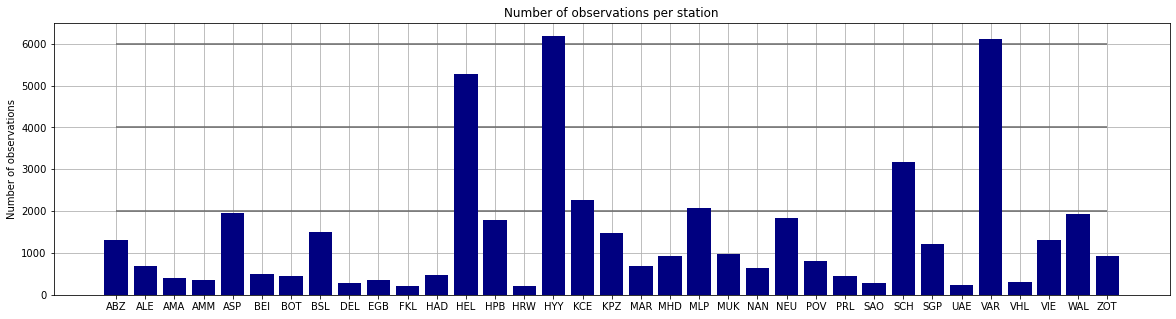

In [3]:
# plotting the number of observations per station
plt.figure(figsize=(20,5))
plt.grid(zorder=40)
i = 2
for s in stations:
    plt.bar(s, len(data.loc[data.station == s]), zorder=i, color='navy')
    i += 1

plt.hlines([2000, 4000, 6000], 0, len(stations)-1, color='dimgrey')
plt.ylabel('Number of observations')
plt.title('Number of observations per station');

In [4]:
# ----------------------------------------------------------------------
# OLD CODE - use if only 1 year of data should be used from each station
# ----------------------------------------------------------------------

# selecting 1 year of data from each station based on the start and end dates 
# specified in metadata/date_ranges_of_stations.csv
# date_ranges = pd.read_csv('metadata/date_ranges_of_stations.csv', 
#                           parse_dates=['start_date', 'end_date'], dayfirst=True)

# new_data = []
# for s in stations:
#     sd = date_ranges.start_date.loc[date_ranges.station == s].iloc[0]
#     ed = date_ranges.end_date.loc[date_ranges.station == s].iloc[0]
#     s_data = data.loc[data.station == s]
#     s_data = s_data.loc[s_data.date >= sd]
#     s_data = s_data.loc[s_data.date <= ed]
#     new_data.append(s_data)

# new_data = pd.concat(new_data)
# new_data = new_data.reset_index(drop=True)

# plt.hist(data.date, bins=100, label='old dataset')
# plt.hist(new_data.date, bins=100, label='new dataset')
# plt.title('Distributions of dates')
# plt.legend()

# data = new_data

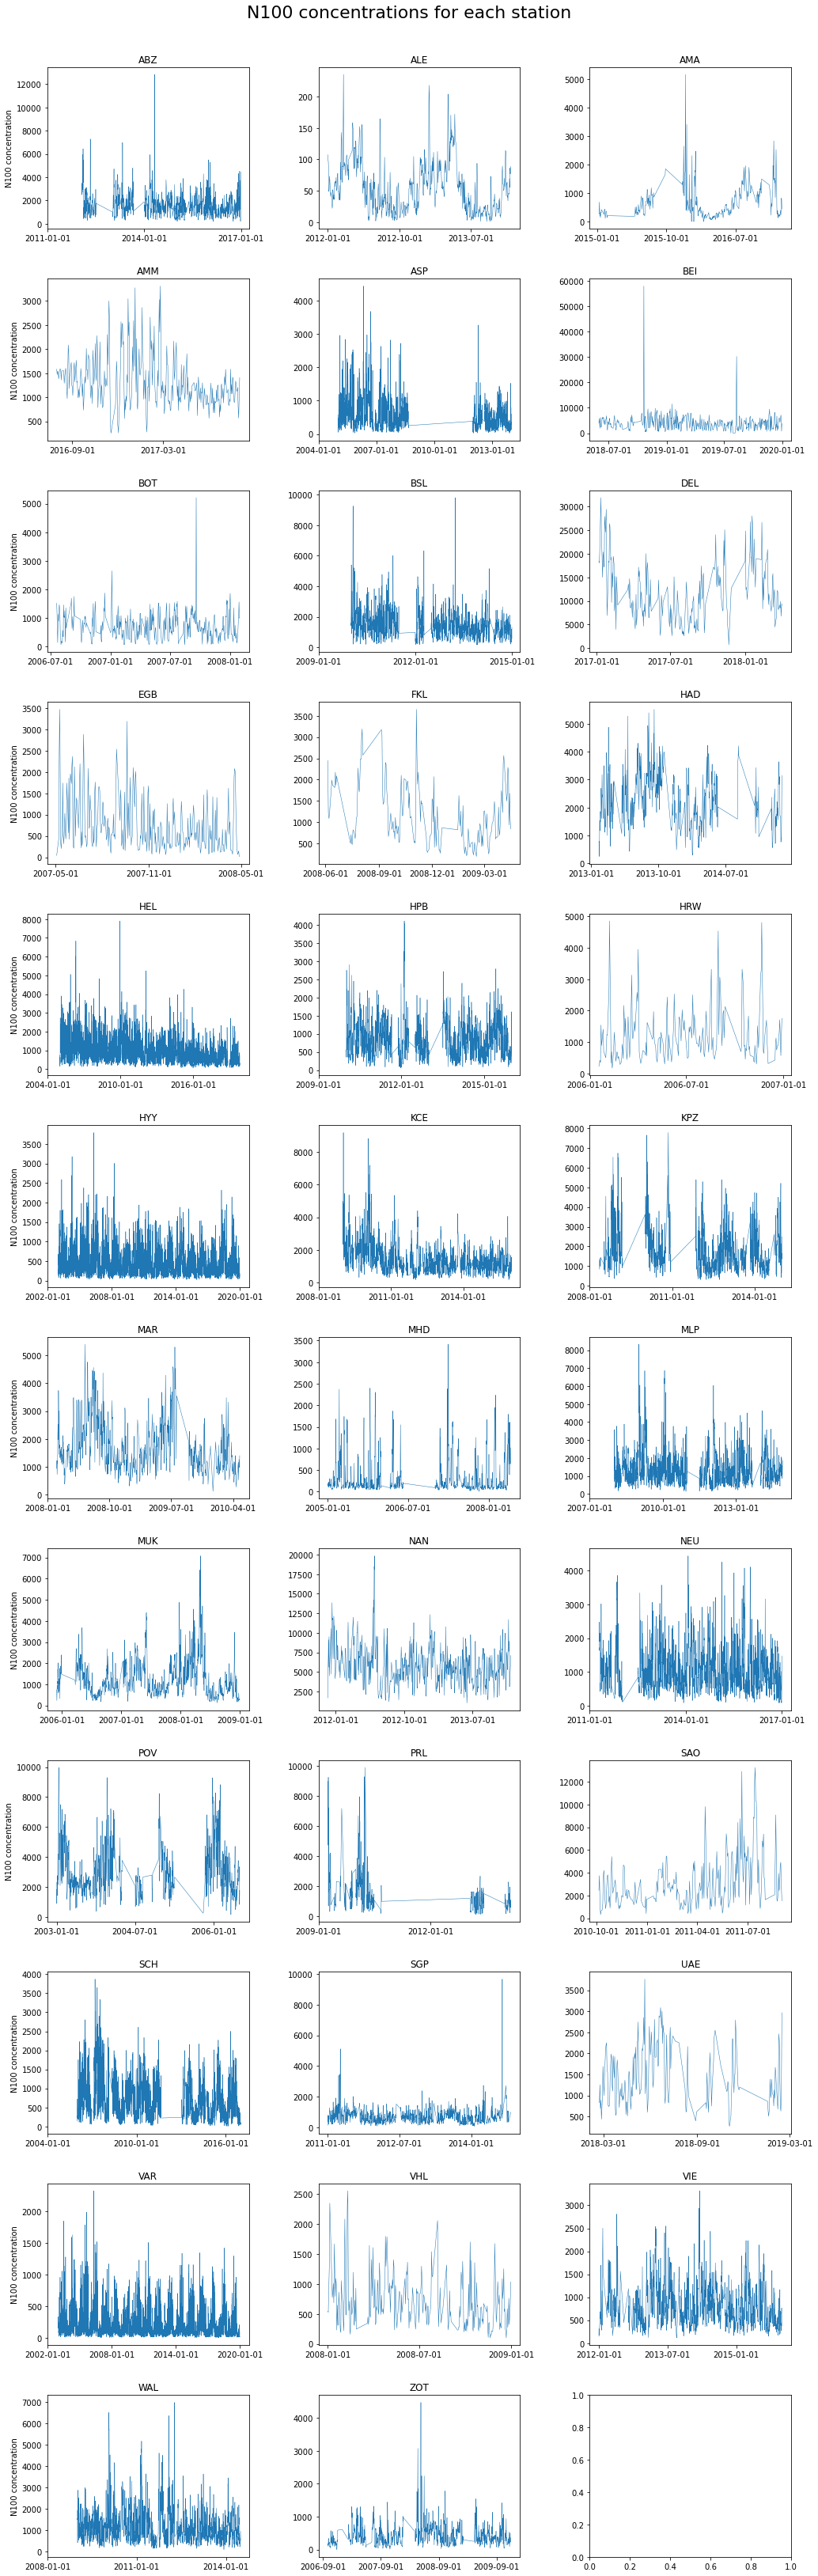

In [5]:
# plotting the n100 data for each station over time
fig, axes = plt.subplots(12, 3, figsize=(15,45))
axes = iter(axes)
i = 0

for s in stations:
    if i%3 == 0:
        axis = next(axes)
    ax = axis[i%3]
    ax.plot(data.date.loc[data.station == s], data.n100.loc[data.station == s], lw=0.5)
    ax.set_title(s)
    ax.set_xticks(ax.get_xticks()[::3])
    if i%3 == 0:
        ax.set_ylabel('N100 concentration')
    i += 1
    
fig.tight_layout(pad=3)
fig.suptitle('N100 concentrations for each station', y=1.01, fontsize=22);

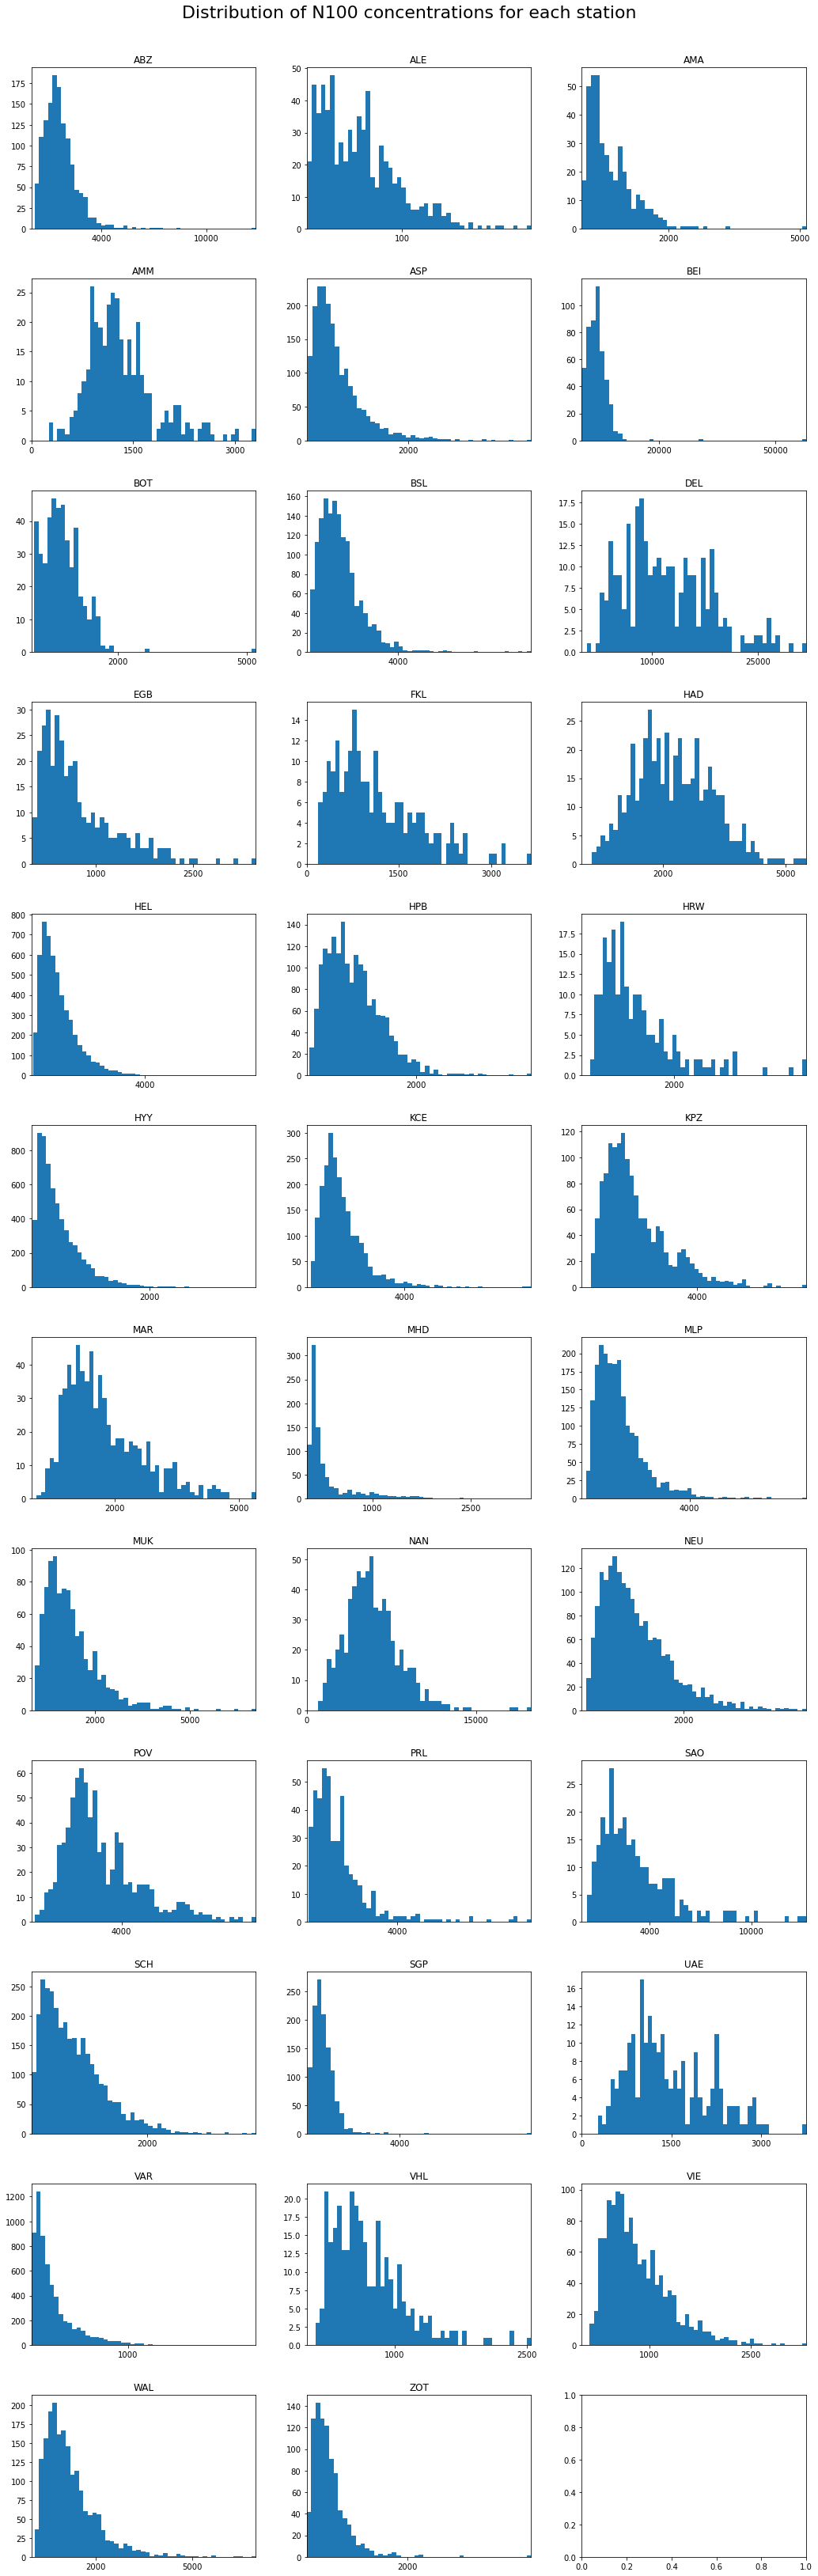

In [6]:
# plotting the distribution of n100 values for each station
fig, axes = plt.subplots(12, 3, figsize=(15, 45))
axes = iter(axes)
i = 0

for s in stations:
    if i%3 == 0:
        axis = next(axes)
    ax = axis[i%3]
    ax.hist(data.n100.loc[data.station == s], bins=50)
    ax.set_title(s)
    ax.set_xticks(ax.get_xticks()[::3])
    ax.set_xlim(0, max(data.n100.loc[data.station == s]))
    i += 1
    
fig.tight_layout(pad=3)
fig.suptitle('Distribution of N100 concentrations for each station', y=1.01, fontsize=22);

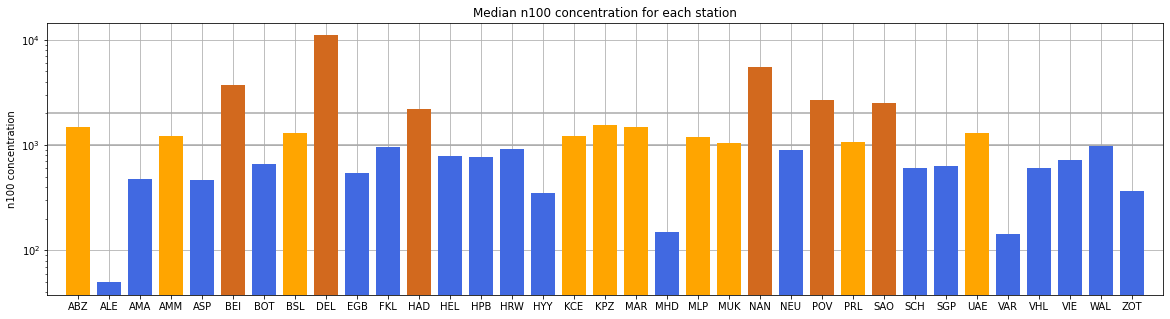

In [7]:
# plotting the median n100 concentration of each station
n100_medians = []
for s, group in data.groupby('station'):
    n100_medians.append(group.n100.median())
    
n100_medians_groups = np.where(np.array(n100_medians) > 1000, 'medium', 'low')
n100_medians_groups = np.where(np.array(n100_medians) > 2000, 'high', n100_medians_groups)
n100_medians_colors = list(map(lambda x: {'high':'chocolate', 'medium':'orange', 'low':'royalblue'}[x], 
                               n100_medians_groups))

plt.figure(figsize=(20,5))
plt.bar(stations, n100_medians, zorder=3, color=n100_medians_colors)
plt.grid(zorder=1)
plt.hlines([1000, 2000], xmin=-2, xmax=len(stations)+1, zorder=2, color='darkgrey')
plt.title('Median n100 concentration for each station')
plt.ylabel('n100 concentration')
plt.semilogy(base=10)
plt.xlim(-1, len(stations));

In [8]:
# dictionary of all variables mapping to their full names
variable_dict = {'n100': 'N100 concentration',
                 'aermr01': 'Sea salt aerosol (0.03 - 0.5 µm)\nmixing ratio',
                 'aermr02': 'Sea salt aerosol (0.5 - 5 µm)\nmixing ratio',
                 'aermr03': 'Sea salt aerosol (5 - 20 µm)\nmixing ratio',
                 'aermr04': 'Dust aerosol (0.03 - 0.55 µm)\nmixing ratio',
                 'aermr05': 'Dust aerosol (0.55 - 0.9 µm)\nmixing ratio',
                 'aermr06': 'Dust aerosol (0.9 - 20 µm)\nmixing ratio',
                 'aermr07': 'Hydrophilic organic matter\naerosol mixing ratio',
                 'aermr08': 'Hydrophobic organic matter\naerosol mixing ratio',                 
                 'aermr09': 'Hydrophilic black carbon\naerosol mixing ratio',
                 'aermr10': 'Hydrophobic black carbon\naerosol mixing ratio',
                 'aermr11': 'Sulphate aerosol mixing ratio',
                 'co': 'Carbon monoxide',
                 'c5h8': 'Isoprene',
                 'c10h16': 'Terpenes',
                 'nh3': 'Ammonia',
                 'no': 'Nitrogen monoxide',
                 'no2': 'Nitrogen dioxide',
                 'so2': 'Sulphur dioxide',
                 'd2m': 'Dew point temperature\nat 2m height',
                 't2m': 'Air temperature\nat 2m height',
                 'crwc': 'Specific rain water content',
                 'blh': 'Boundary layer height',
                 'rh': 'Relative humidity',
                 'wind_speed': 'Wind speed',
                 'doy_sin': 'Sine of the day of the year',
                 'doy_cos': 'Cosine of the day of the year',
                 'latitude': 'Latitude',
                 'longitude': 'Longitude'}

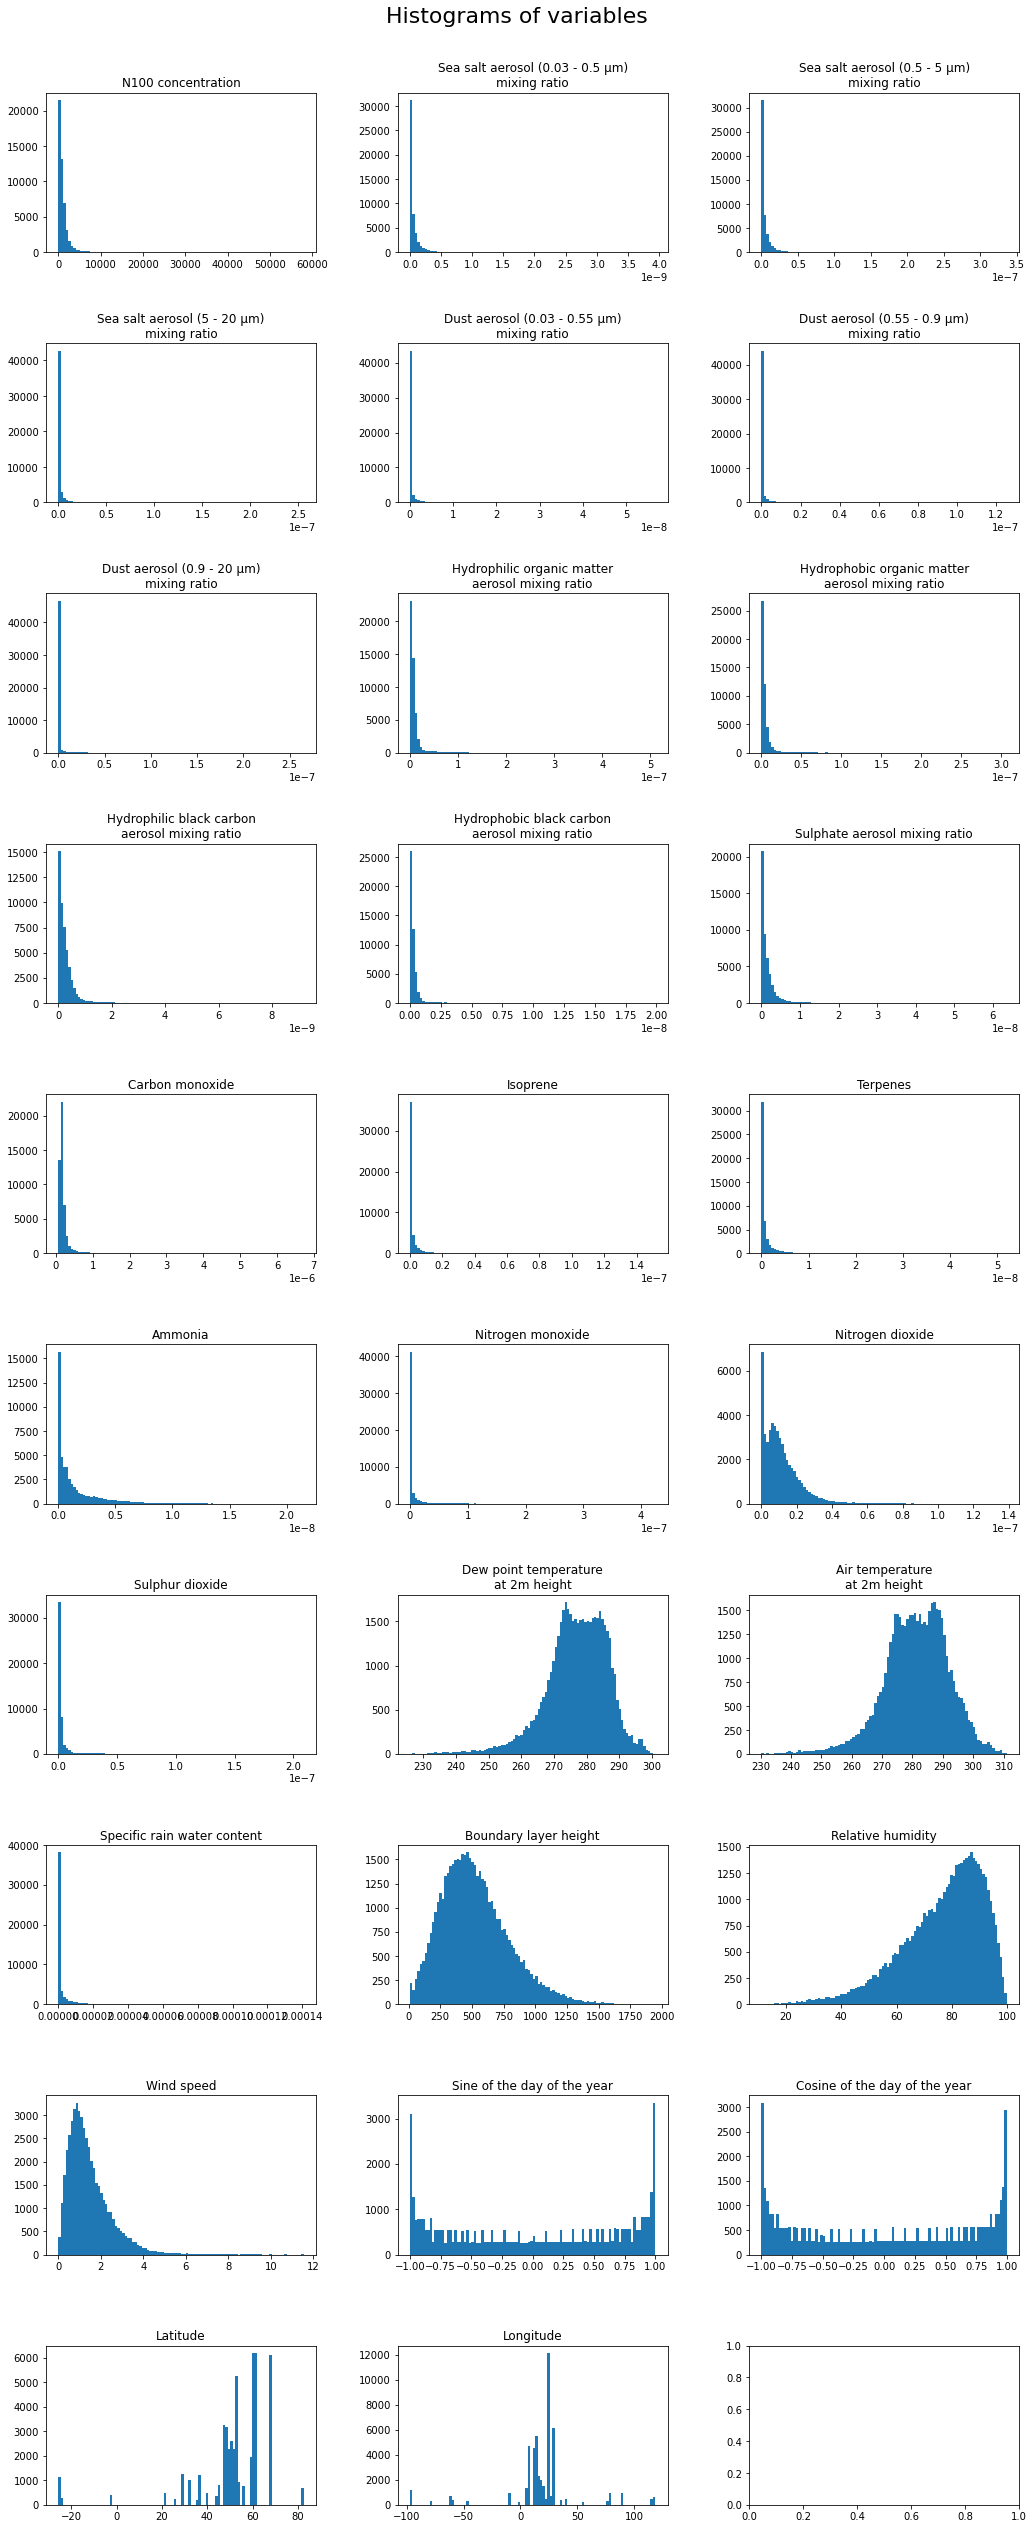

In [9]:
# plotting the distributions of n100 and all variables (not log-transformed)
ncols = 3
fig, axes = plt.subplots(10, ncols, figsize=(15, 35))
axes = iter(axes)
i = 0

for v in ['n100']+variables:
    if i%ncols == 0:
        axis = next(axes)
    ax = axis[i%ncols]
    ax.hist(data[v], bins=100)
    ax.set_title(variable_dict[v])
    i += 1
    
fig.tight_layout(pad=3)
fig.suptitle('Histograms of variables', y=1.01, fontsize=22);

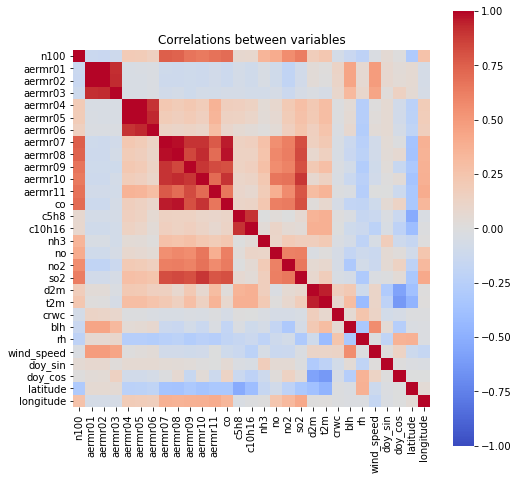

In [10]:
# plotting the correlations between the variables (not log-transformed)
plt.figure(figsize=(8, 8))
sns.heatmap(data[['n100']+variables].corr(), vmin=-1, vmax=1, xticklabels=['n100']+variables, 
            yticklabels=['n100']+variables, cmap='coolwarm', cbar=True, square=True)
plt.title('Correlations between variables');

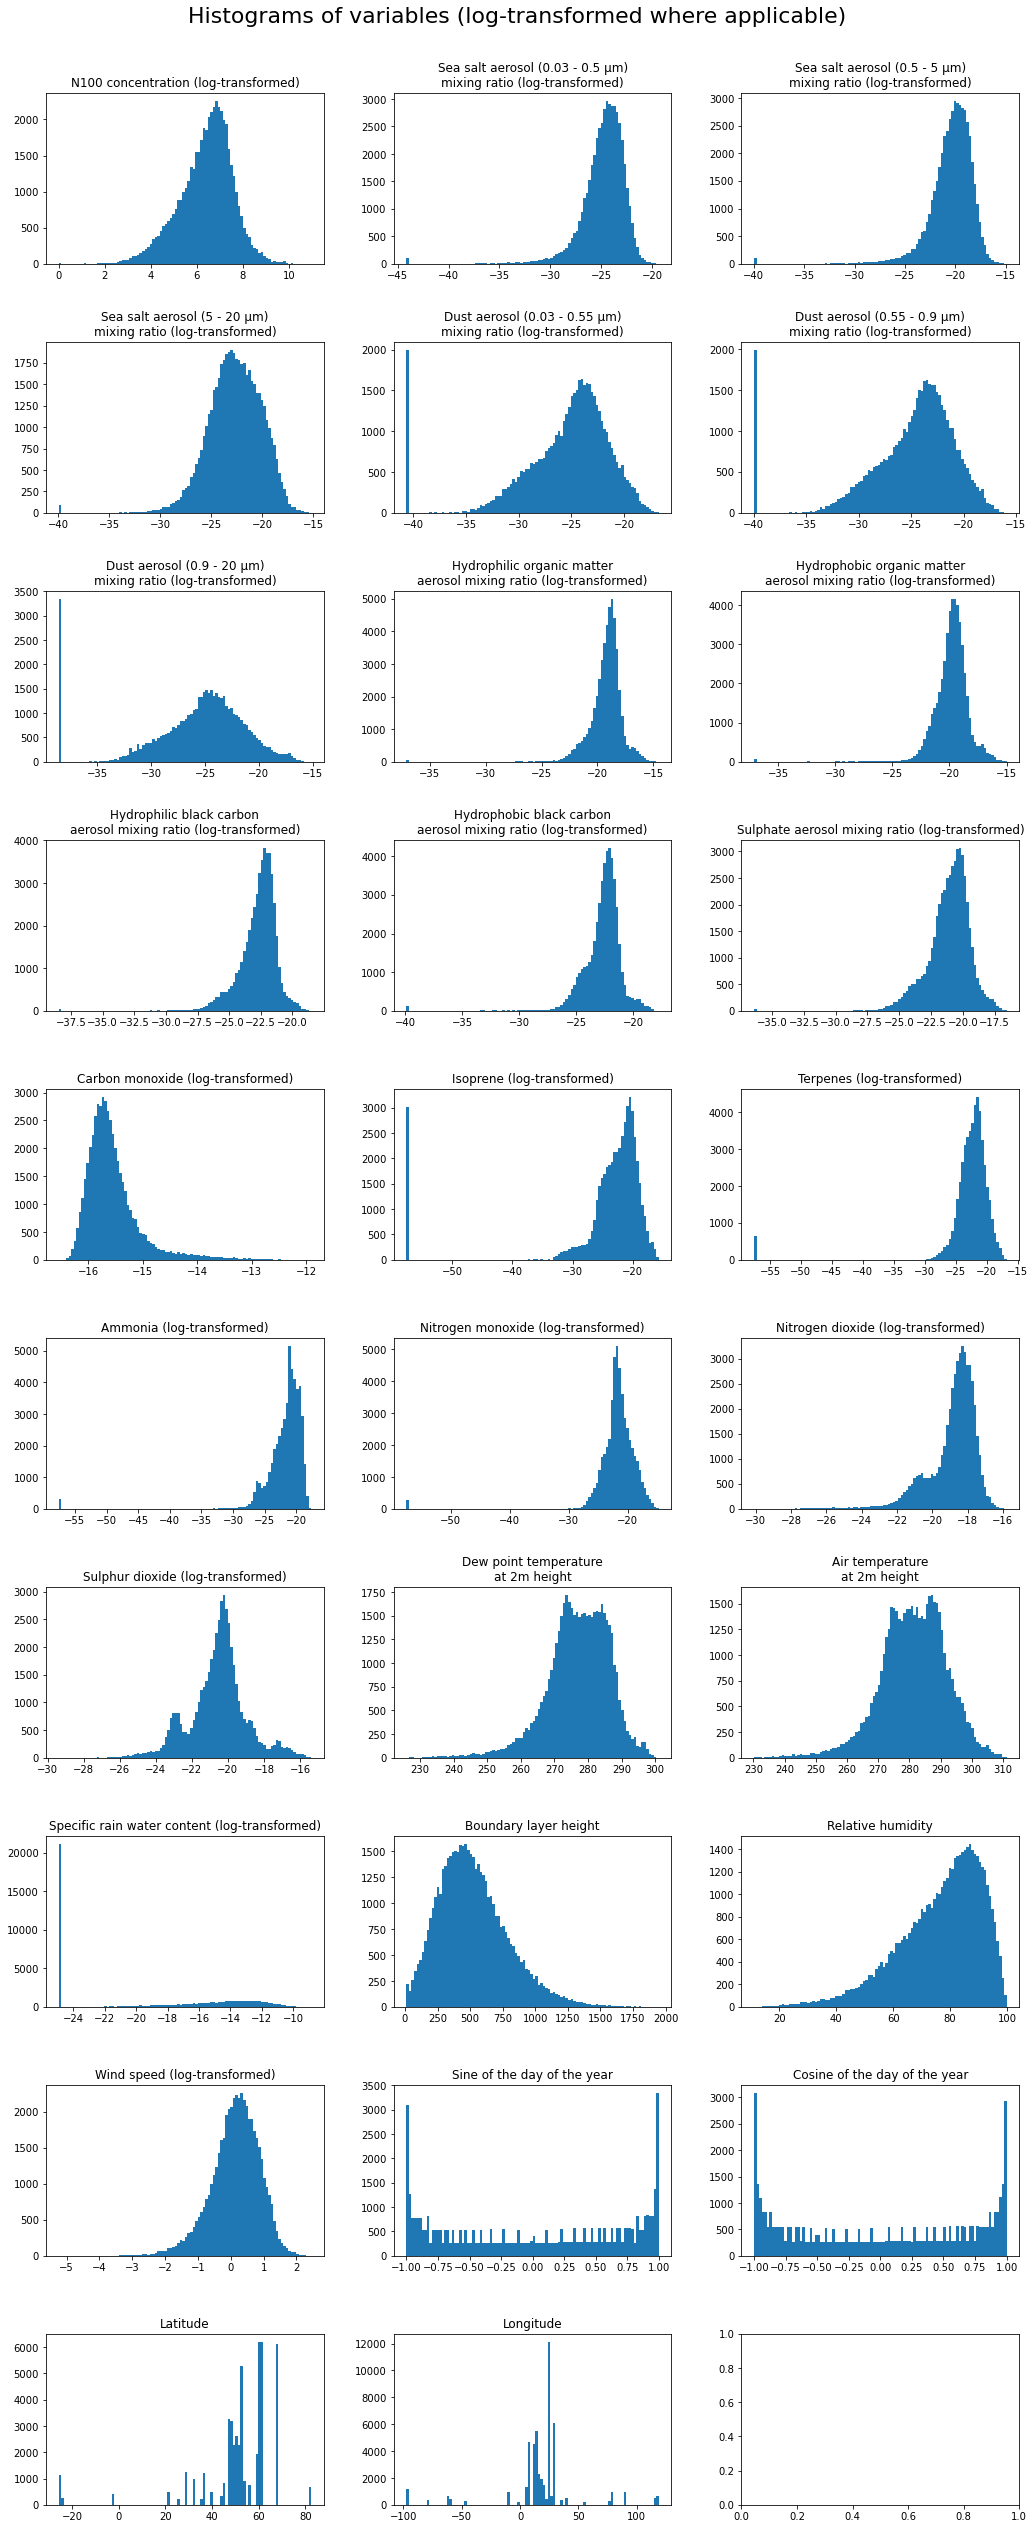

In [11]:
# plotting the distributions of n100 and all variables (log-transformed where applicable)
ncols = 3
fig, axes = plt.subplots(10, ncols, figsize=(15, 35))
axes = iter(axes)
i = 0

for v in ['n100_log']+transf_vars:
    if i%ncols == 0:
        axis = next(axes)
    ax = axis[i%ncols]
    ax.hist(data[v], bins=100)
    if v[-3:] == 'log':
        ax.set_title(variable_dict[v[:-4]] +' (log-transformed)')
    else:
        ax.set_title(variable_dict[v])
    i += 1
    
fig.tight_layout(pad=3)
fig.suptitle('Histograms of variables (log-transformed where applicable)', y=1.01, fontsize=22);

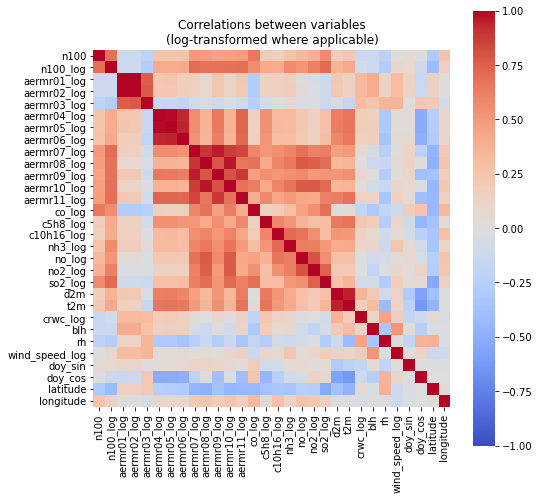

In [12]:
# plotting the correlations between the variables (log-transformed where applicable)
plt.figure(figsize=(8, 8))        
sns.heatmap(data[['n100', 'n100_log']+transf_vars].corr(), 
            xticklabels=['n100', 'n100_log']+transf_vars, yticklabels=['n100', 'n100_log']+transf_vars, 
            cmap='coolwarm', cbar=True, square=True, vmin=-1, vmax=1)
plt.title('Correlations between variables\n(log-transformed where applicable)');

In [13]:
print('Strongest correlations of variables with N100 (before and after log-transforming):')

for v in variables:
    corr = np.round(pearsonr(data[v], data.n100), 3)
    extra_space = int(corr[0] >= 0)
    offset = 14 - len(v) + extra_space
    
    if v+'_log' in data.columns:
        transf_corr = np.round(pearsonr(data[v+'_log'], data.n100), 3)
        if np.abs(transf_corr[0]) > np.abs(corr[0]):
            print(v, ' '*offset, corr[0], '\t', ' '*extra_space, transf_corr[0], 
                  ' \tcorr higher with transformed data')
        else:
            print(v, ' '*offset, corr[0], '\t', ' '*extra_space, transf_corr[0])
    else:
        print(v, ' '*offset, corr[0])

Strongest correlations of variables with N100 (before and after log-transforming):
aermr01         -0.14 	  -0.124
aermr02         -0.141 	  -0.128
aermr03         -0.11 	  -0.204  	corr higher with transformed data
aermr04          0.203 	   0.254  	corr higher with transformed data
aermr05          0.189 	   0.251  	corr higher with transformed data
aermr06          0.151 	   0.263  	corr higher with transformed data
aermr07          0.753 	   0.493
aermr08          0.736 	   0.481
aermr09          0.669 	   0.449
aermr10          0.646 	   0.463
aermr11          0.678 	   0.479
co               0.7 	   0.651
c5h8             0.073 	   0.19  	corr higher with transformed data
c10h16           0.083 	   0.16  	corr higher with transformed data
nh3              0.35 	   0.264
no               0.4 	   0.325
no2              0.559 	   0.378
so2              0.629 	   0.563
d2m              0.178
t2m              0.231
crwc            -0.077 	  -0.143  	corr higher with transformed data
b

In [14]:
print('Strongest correlations of variables with log-transformed N100 (before and after log-transforming):')

for v in variables:
    corr = np.round(pearsonr(data[v], data.n100_log), 3)
    extra_space = int(corr[0] >= 0)
    offset = 14 - len(v) + extra_space
    
    if v+'_log' in data.columns:
        transf_corr = np.round(pearsonr(data[v+'_log'], data.n100_log), 3)
        if np.abs(transf_corr[0]) > np.abs(corr[0]):
            print(v, ' '*offset, corr[0], '\t', ' '*extra_space, transf_corr[0], 
                  ' \tcorr higher with transformed data')
        else:
            print(v, ' '*offset, corr[0], '\t', ' '*extra_space, transf_corr[0])
    else:
        print(v, ' '*offset, corr[0])

Strongest correlations of variables with log-transformed N100 (before and after log-transforming):
aermr01         -0.214 	  -0.11
aermr02         -0.216 	  -0.113
aermr03         -0.207 	  -0.266  	corr higher with transformed data
aermr04          0.193 	   0.402  	corr higher with transformed data
aermr05          0.186 	   0.401  	corr higher with transformed data
aermr06          0.157 	   0.416  	corr higher with transformed data
aermr07          0.457 	   0.697  	corr higher with transformed data
aermr08          0.425 	   0.673  	corr higher with transformed data
aermr09          0.494 	   0.672  	corr higher with transformed data
aermr10          0.426 	   0.684  	corr higher with transformed data
aermr11          0.479 	   0.69  	corr higher with transformed data
co               0.402 	   0.56  	corr higher with transformed data
c5h8             0.122 	   0.409  	corr higher with transformed data
c10h16           0.158 	   0.402  	corr higher with transformed data
nh3       